## Observations and Insights 

1: Gender does not seem to make a difference for results

2: Capomulin and Ramicane had more measurements taken than the other drugs, and should be noted when viewing data

3: Tumor Volume and Weight have a positive correlation 

In [188]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [191]:
# Checking the number of mice.
mice = len(pd.unique(data["Mouse ID"]))
print(f'Number of Mice: {mice}')

Number of Mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [195]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [197]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(pd.unique(clean_data["Mouse ID"]))
print(f'Number of Mice: {clean_mice}')

Number of Mice: 249


## Summary Statistics

In [198]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_data.groupby(["Drug Regimen"]).mean()
mean = mean[["Tumor Volume (mm3)"]]

median = clean_data.groupby(["Drug Regimen"]).median()
median = median[["Tumor Volume (mm3)"]]

variance = clean_data.groupby(["Drug Regimen"]).var()
variance = variance[["Tumor Volume (mm3)"]]

std = clean_data.groupby(["Drug Regimen"]).std()
std = std[["Tumor Volume (mm3)"]]

sem = clean_data.groupby(["Drug Regimen"]).sem()
sem = sem[["Tumor Volume (mm3)"]]

summary = pd.merge(mean, median, on="Drug Regimen")
summary = summary.rename(columns={"Tumor Volume (mm3)_x": "Tumor Volume (Mean)", 
                                  "Tumor Volume (mm3)_y": "Tumor Volume (Median)"})
summary = pd.merge(summary, variance, on="Drug Regimen")
summary = summary.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (Variance)"})
summary = pd.merge(summary, std, on="Drug Regimen")
summary = summary.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (STD)"})
summary = pd.merge(summary, sem, on="Drug Regimen")
summary = summary.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (SEM)"})

summary

,Tumor Volume (Mean),Tumor Volume (Median),Tumor Volume (Variance),Tumor Volume (STD),Tumor Volume (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


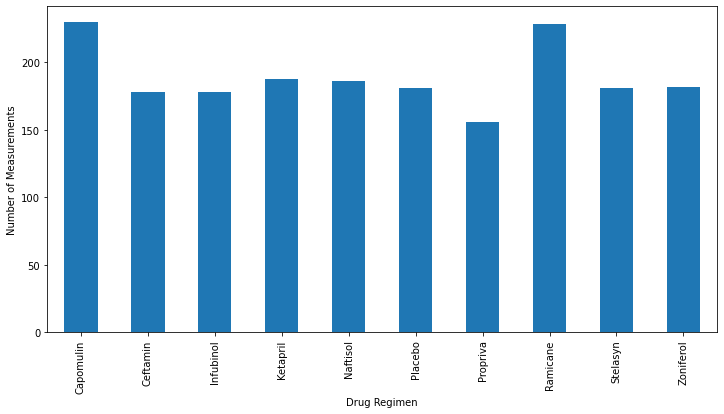

In [199]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
meas_df = clean_data.groupby("Drug Regimen").count()
meas_df = meas_df[["Mouse ID"]]

bar = meas_df.plot(kind="bar", figsize=(12, 6), legend=False, ylabel=("Number of Measurements"))

meas_df.head(10)

<BarContainer object of 10 artists>

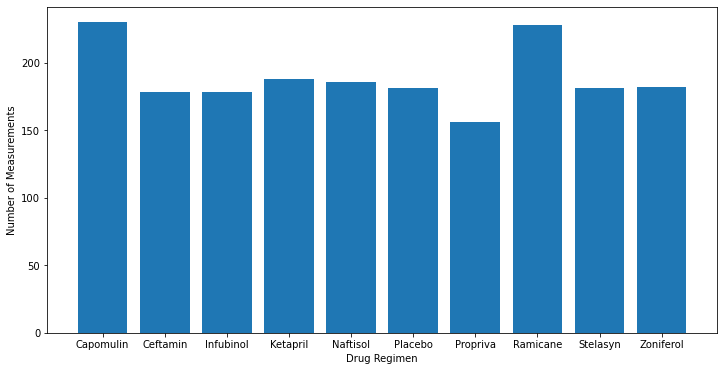

In [200]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = meas_df.index
y_axis = meas_df['Mouse ID']
plt.figure(figsize=(12,6))
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')

plt.bar(x_axis, y_axis)


,Mouse ID
Sex,
Female,124
Male,125


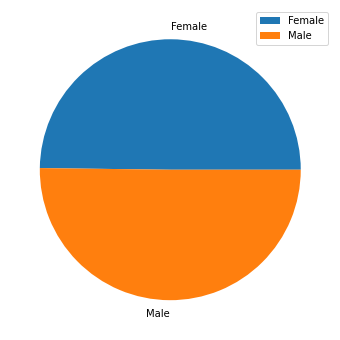

In [201]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_data.drop_duplicates("Mouse ID")
gender_df = gender_df.groupby("Sex").count()
gender_df = gender_df[["Mouse ID"]]

pie = gender_df.plot(kind="pie", subplots=True, figsize=(6, 6), ylabel=(''))

gender_df

([<matplotlib.patches.Wedge at 0x121f41cd0>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')])

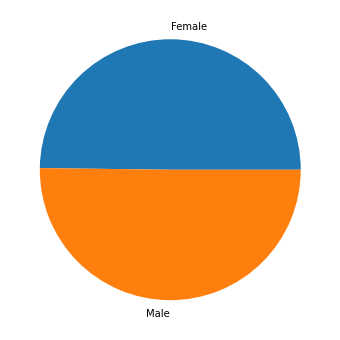

In [202]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_df.index
data = gender_df['Mouse ID']
plt.figure(figsize=(6,6))

plt.pie(data, labels=labels)


## Quartiles, Outliers and Boxplots

In [203]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


four_df = clean_data.drop_duplicates(["Mouse ID"], keep='last')

four_df = four_df[(four_df['Drug Regimen'] == 'Capomulin') |
                  (four_df['Drug Regimen'] == 'Ramicane') |
                  (four_df['Drug Regimen'] == 'Infubinol') |
                  (four_df['Drug Regimen'] == 'Ceftamin')]

four_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capomulin_vol = []
ramicane_vol = []
infubinol_vol = []
ceftamin_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr_df = four_df[['Tumor Volume (mm3)']]

q3, q2, q1 = np.percentile(iqr_df['Tumor Volume (mm3)'], [75, 50 ,25])
q1 = round(q1,2)
q2 = round(q2,2)
q3 = round(q3,2)

iqr = q3 - q1
iqr = round(iqr,2)

upper = q3+iqr*1.5
upper = round(upper,2)
lower = q1-iqr*1.5
lower = round(lower,2)

    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in four_df.index:
    if four_df['Drug Regimen'][x] == 'Capomulin': 
        capomulin_vol.append(four_df['Tumor Volume (mm3)'][x])
    elif four_df['Drug Regimen'][x] == 'Ramicane': 
        ramicane_vol.append(four_df['Tumor Volume (mm3)'][x])
    elif four_df['Drug Regimen'][x] == 'Infubinol': 
        infubinol_vol.append(four_df['Tumor Volume (mm3)'][x])
    elif four_df['Drug Regimen'][x] == 'Ceftamin': 
        ceftamin_vol.append(four_df['Tumor Volume (mm3)'][x])
    
    # add subset 
tumorvol_df = pd.DataFrame({
    'Capomulin': capomulin_vol,
    'Ramicane': ramicane_vol,
    'Infubinol': infubinol_vol,
    'Ceftamin': ceftamin_vol
})       
    
    # Determine outliers using upper and lower bounds
print(f'Q1 = {q1}')
print(f'Q2 = {q2}')
print(f'Q3 = {q3}')
print(f'IQR = {iqr}')
print(f'Outlier Upper Boundry = {upper}')
print(f'Outlier Lower Boundry = {lower}')
tumorvol_df

Q1 = 37.19
Q2 = 45.0
Q3 = 59.93
IQR = 22.74
Outlier Upper Boundry = 94.04
Outlier Lower Boundry = 3.08


,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


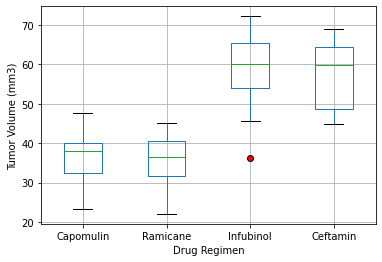

In [204]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumorvol_df.boxplot(flierprops=flierprops)
flierprops = dict(marker='o', markerfacecolor='r')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,0,45.000000
11,s185,Capomulin,5,43.878496
12,s185,Capomulin,10,37.614948
13,s185,Capomulin,15,38.177232
14,s185,Capomulin,20,36.866876
15,s185,Capomulin,25,33.949940
16,s185,Capomulin,30,32.959671
17,s185,Capomulin,35,28.328531
18,s185,Capomulin,40,25.472143
19,s185,Capomulin,45,23.343598


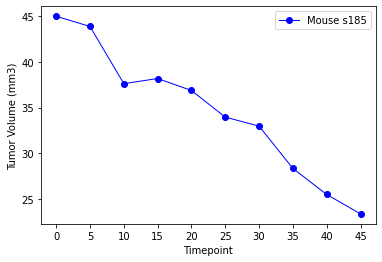

In [205]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = clean_data[['Mouse ID', 'Drug Regimen','Timepoint', 'Tumor Volume (mm3)']]
line_df = line_df[line_df['Drug Regimen'] == 'Capomulin']
line_df = line_df[line_df['Mouse ID'] == 's185']

x_axis = line_df['Timepoint'].tolist()
y_axis = line_df['Tumor Volume (mm3)'].tolist()

plt.plot(x_axis, y_axis, marker='o', color='b', linewidth=1, label='Mouse s185')
plt.xticks(np.arange(0, 50, step=5))
plt.legend(loc="best")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

line_df

Text(0, 0.5, 'Weight (g)')

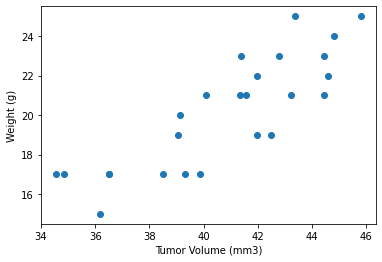

In [206]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = clean_data[['Mouse ID', 'Drug Regimen','Weight (g)', 'Tumor Volume (mm3)']]
scatter_df = scatter_df[scatter_df['Drug Regimen'] == 'Capomulin']
scatter_df = scatter_df.groupby('Mouse ID').mean()

x = scatter_df['Tumor Volume (mm3)']
y = scatter_df['Weight (g)']

#scatter_df = scatter_df.groupby('Tumor Volume (mm3)').mean()
scatter_df

plt.scatter(x, y)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')

## Correlation and Regression

The r-squared is: 0.7088568047708717


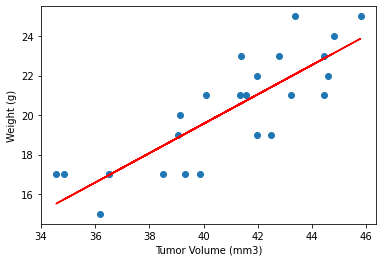

In [207]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = scatter_df['Tumor Volume (mm3)']
y = scatter_df['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

